# Analyse

- Analyse du dataset nettoyé et en déduire des tendances

## Imports

In [1]:
import pandas as pd
import numpy as np
import missingno as msno

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn import preprocessing

import seaborn as sns

import warnings

#### Message d'avertissement

In [2]:
warnings.filterwarnings("ignore")

#### Dimension DataFramme

In [3]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

#### Import dataset

In [4]:
data = pd.read_csv("./Data/Data_Olist.csv")

In [5]:
def visu(dataf) : # Fonction visualisation du taux de remplissage
    df = pd.DataFrame(index=['Valeurs manquantes','Nombre de valeurs' ,'Taux de remplissage','Valeurs différentes'], columns= dataf.columns )
    
    for v in dataf.columns:
        #Somme des valeurs manquantes
        df.loc['Valeurs manquantes', v] = dataf[v].isnull().sum()
        # Nombre de valeurs 
        df.loc['Nombre de valeurs', v] = dataf.shape[0] - dataf[v].isnull().sum()
        #Taux de remplissage en %
        df.loc['Taux de remplissage', v] =((dataf.shape[0]- dataf[v].isnull().sum())/(dataf.shape[0]*1.0))*100 
        # Nombre de valeurs différentes
        df.loc['Valeurs différentes', v] = dataf[v].nunique()
        
    df1 = df.T #Tranposition du Dataframe
    # Conversion du type des colonnes
    df1['Valeurs manquantes'] = df1['Valeurs manquantes'].astype(int) 
    df1['Nombre de valeurs'] = df1['Nombre de valeurs'].astype(int)
    df1['Taux de remplissage'] = df1['Taux de remplissage'].astype(float)
    df1['Valeurs différentes'] = df1['Valeurs différentes'].astype(int)
    df1 = df1.sort_values(by=['Taux de remplissage'], ascending = False)
    
    plt.figure(figsize= (5,5))
    sns.set_theme()
    sns.barplot(x=df1["Taux de remplissage"], y=df1.index, palette="Blues_r")
    plt.xlabel("Taux de remplissage en (%)", fontsize=13)
    plt.ylabel("Colonnes", fontsize=13)
    plt.title("Taux de replissage des colonnes", fontsize=16)
    plt.axvline(x=20, color='w')
    plt.axvline(x=80, color='w')
    
    plt.show()
    
    return df
    

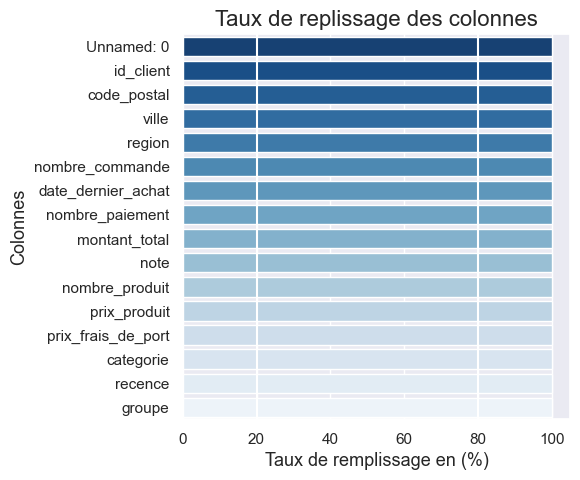

,Unnamed: 0,id_client,code_postal,ville,region,nombre_commande,date_dernier_achat,nombre_paiement,montant_total,note,nombre_produit,prix_produit,prix_frais_de_port,categorie,recence,groupe
Valeurs manquantes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Nombre de valeurs,94989,94989,94989,94989,94989,94989,94989,94989,94989,94989,94989,94989,94989,94989,94989,94989
Taux de remplissage,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Valeurs différentes,94989,94989,14952,4108,27,9,94730,40,28204,5,20,8345,8191,74,612,15


In [6]:
visu(data)

In [7]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
data.dtypes

id_client              object
code_postal             int64
ville                  object
region                 object
nombre_commande         int64
date_dernier_achat     object
nombre_paiement         int64
montant_total         float64
note                    int64
nombre_produit          int64
prix_produit          float64
prix_frais_de_port    float64
categorie              object
recence                 int64
groupe                 object
dtype: object

In [9]:
data['date_dernier_achat']= data['date_dernier_achat'].astype('datetime64[ns]')

In [10]:
data.dtypes

id_client                     object
code_postal                    int64
ville                         object
region                        object
nombre_commande                int64
date_dernier_achat    datetime64[ns]
nombre_paiement                int64
montant_total                float64
note                           int64
nombre_produit                 int64
prix_produit                 float64
prix_frais_de_port           float64
categorie                     object
recence                        int64
groupe                        object
dtype: object

In [11]:
data.describe()

,code_postal,nombre_commande,nombre_paiement,montant_total,note,nombre_produit,prix_produit,prix_frais_de_port,recence
count,94989.000000,94989.000000,94989.000000,94989.000000,94989.000000,94989.000000,94989.000000,94989.000000,94989.000000
mean,35242.167251,1.033867,3.082315,165.694312,4.104823,1.180200,142.068865,23.595181,270.344493
std,29810.584088,0.210828,2.965409,226.740844,1.315007,0.620553,216.069013,22.866916,152.993593
min,1003.000000,1.000000,0.000000,9.590000,1.000000,1.000000,0.850000,0.000000,27.000000
25%,11432.000000,1.000000,1.000000,63.100000,4.000000,1.000000,47.900000,14.090000,146.000000
50%,24457.000000,1.000000,2.000000,107.900000,5.000000,1.000000,89.890000,17.600000,251.000000
75%,59069.000000,1.000000,4.000000,182.940000,5.000000,1.000000,155.000000,25.540000,379.000000
max,99990.000000,16.000000,64.000000,13664.080000,5.000000,24.000000,13440.000000,1794.960000,756.000000


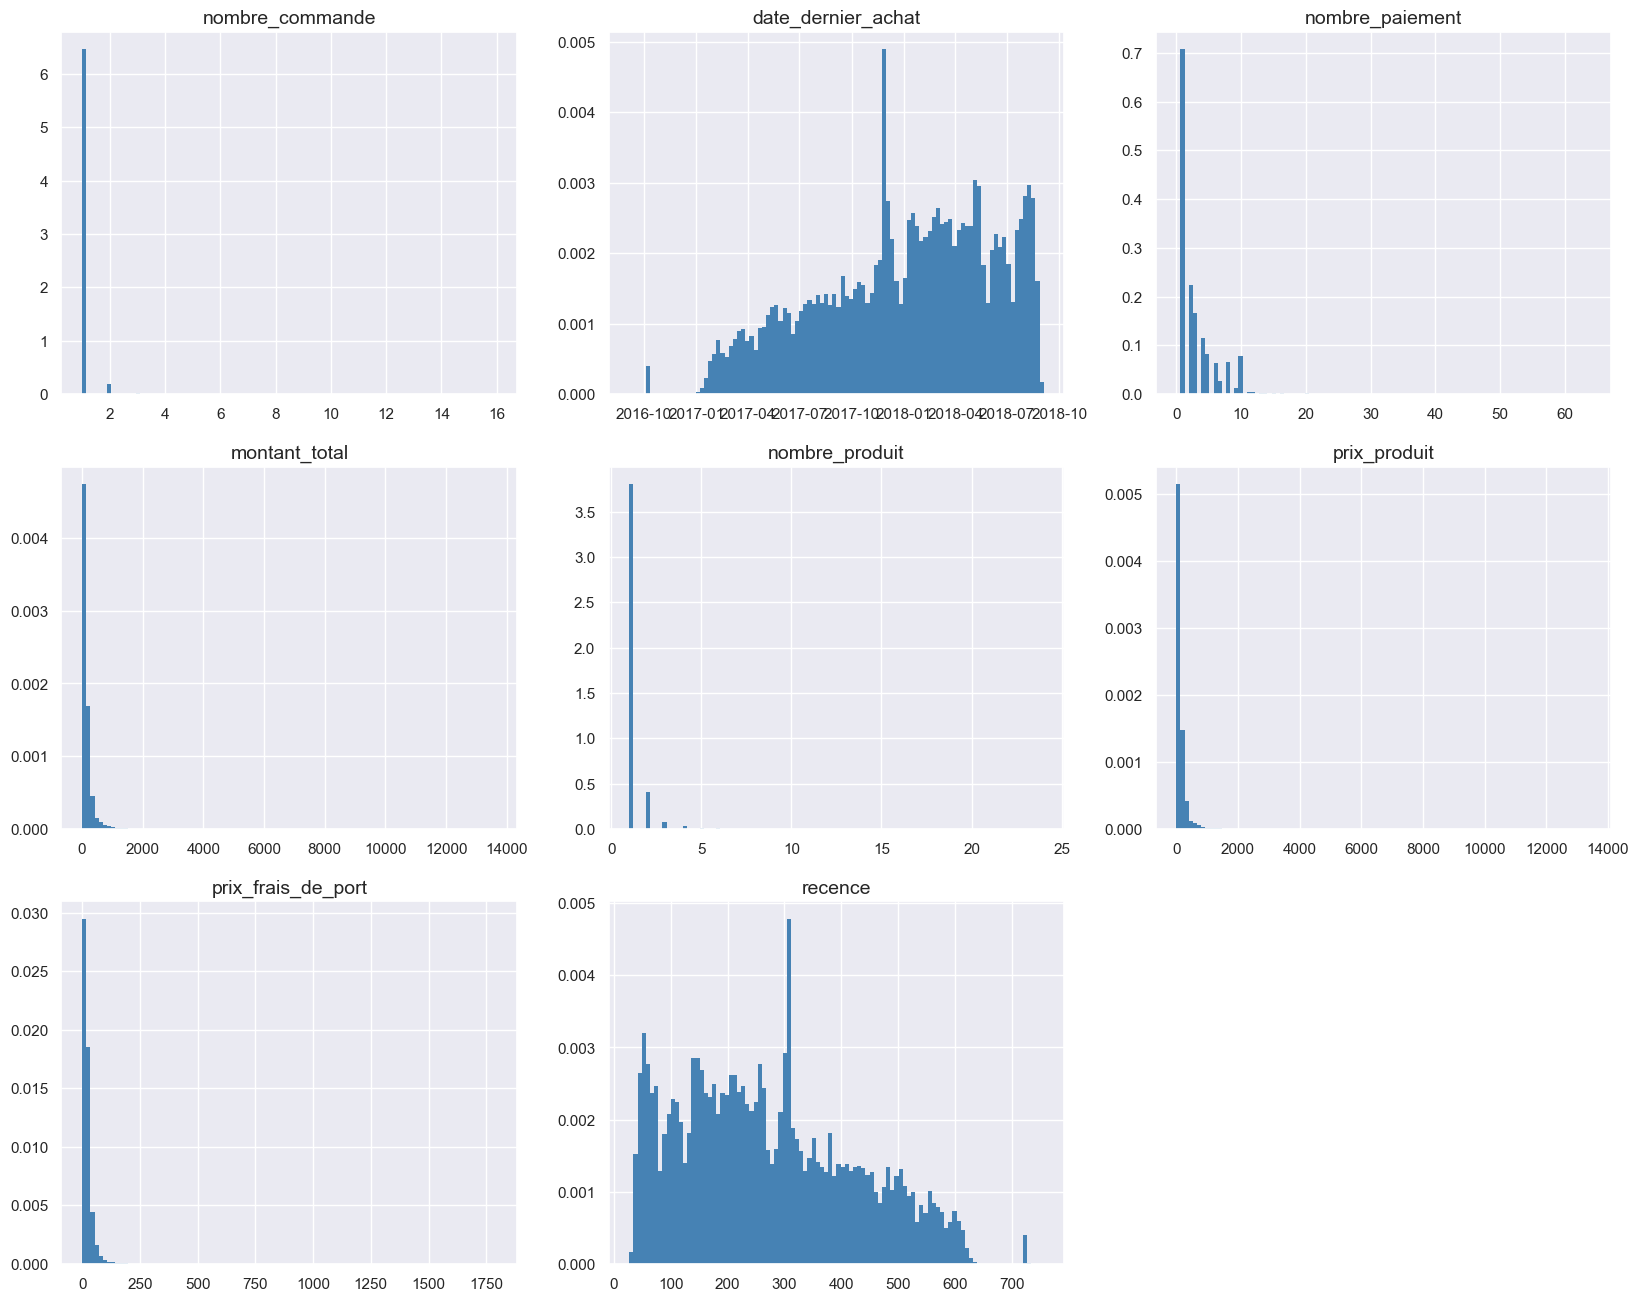

In [12]:
df =  data.drop(['id_client','code_postal','ville','region', 'categorie', 'groupe', 'note'], axis= 1)
fig = plt.figure(figsize=(20, 16))
for feat_idx in range(df.shape[1]):
    ax = fig.add_subplot(3,3, (feat_idx+1))
    h = ax.hist(df.iloc[:, feat_idx], bins=100, color='steelblue', density=True, edgecolor='none')
    ax.set_title(df.columns[feat_idx], fontsize=14)
plt.show()

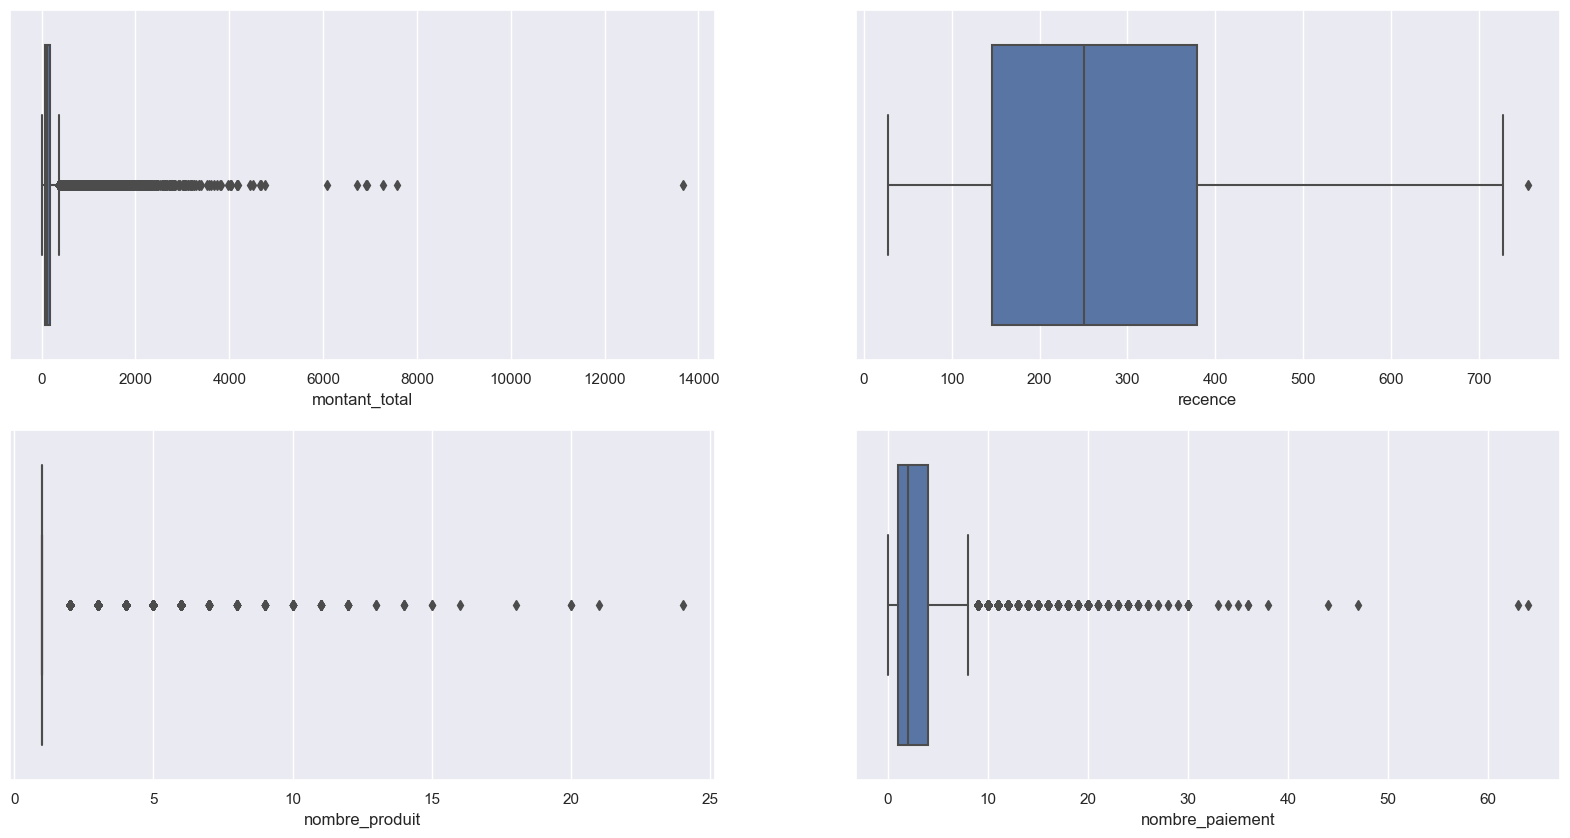

In [20]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(x= data['montant_total'])
plt.subplot(2,2,2)
sns.boxplot(x= data['recence'])
plt.subplot(2,2,3)
sns.boxplot(x= data['nombre_produit'])
plt.subplot(2,2,4)
sns.boxplot(x= data['nombre_paiement'])
plt.show()

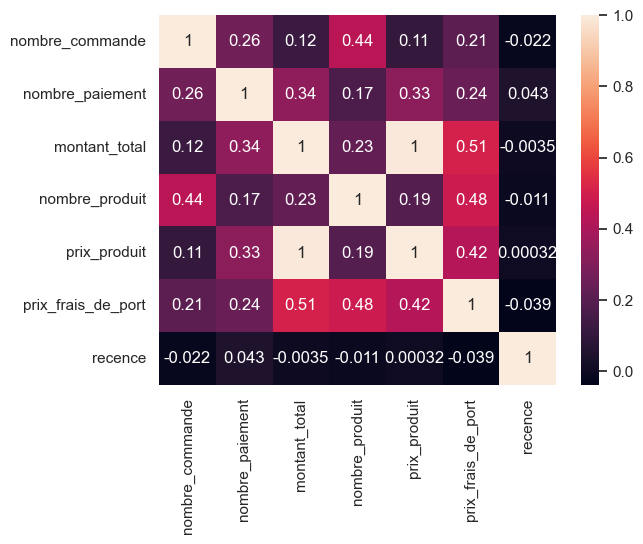

In [14]:
sns.heatmap(df.corr(), annot = True)
plt.savefig("./Visualisations/heatmap", bbox_inches='tight')

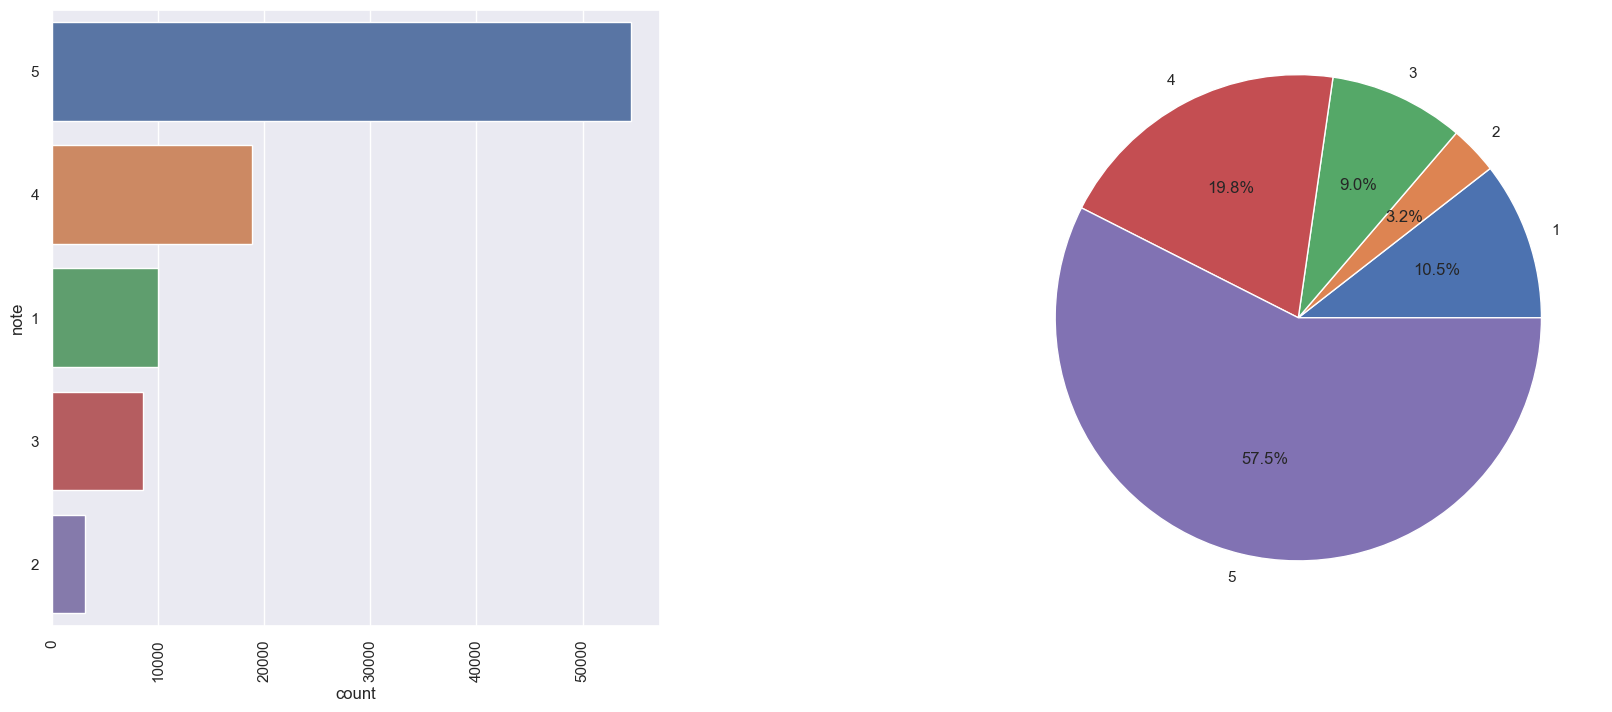

In [23]:
note = data['note'].value_counts()
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(y = data['note'], order= note.index)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
note = note.sort_index()
plt.pie(note, labels= note.index, autopct='%1.1f%%')
plt.subplots_adjust(hspace=0.45,wspace=0.55)
plt.savefig("./Visualisations/Distributions_note", bbox_inches='tight')
plt.show()

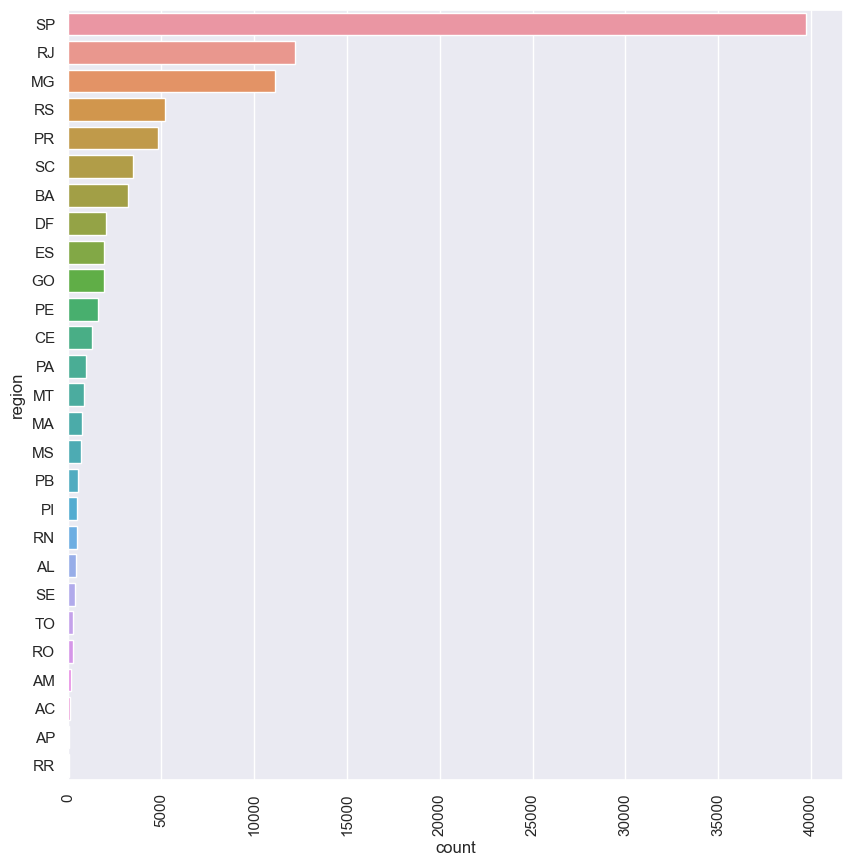

In [16]:
reg = data['region'].value_counts()
plt.figure(figsize=(10,10))
sns.countplot(y = data['region'], order= reg.index)
plt.xticks(rotation=90)
plt.savefig("./Visualisations/Distributions_region", bbox_inches='tight')
plt.show()

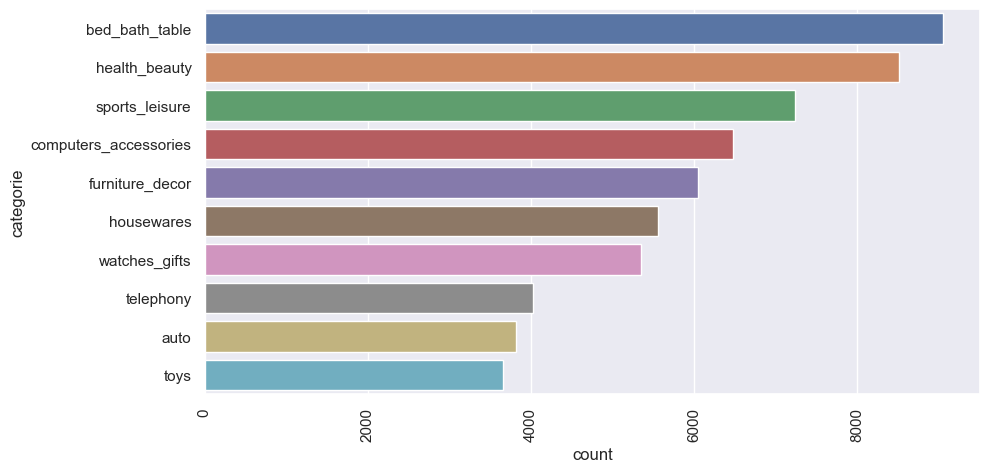

In [17]:
cat = data['categorie'].value_counts()
plt.figure(figsize=(10,5))
sns.countplot(y = data['categorie'], order= cat[:10].index)
plt.xticks(rotation=90)
plt.savefig("./Visualisations/Distributions_top 10_categorie", bbox_inches='tight')
plt.show()

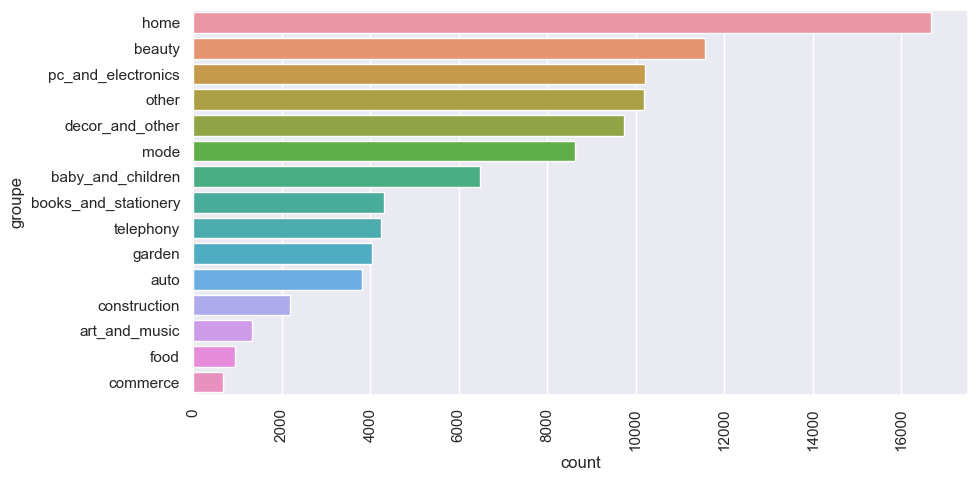

In [18]:
group = data['groupe'].value_counts()
plt.figure(figsize=(10,5))
sns.countplot(y = data['groupe'], order= group.index)
plt.xticks(rotation=90)
plt.savefig("./Visualisations/Distributions_groupe", bbox_inches='tight')
plt.show()

In [19]:
data.loc[data['nombre_paiement']==64]

,id_client,code_postal,ville,region,nombre_commande,date_dernier_achat,nombre_paiement,montant_total,note,nombre_produit,prix_produit,prix_frais_de_port,categorie,recence,groupe
4402,3e43e6105506432c953e165fb2acf44c,11701,praia grande,SP,9,2018-02-27 18:36:39,64,1172.66,3,14,1000.85,171.82,bed_bath_table,215,home
